In [ ]:
import numpy as np

In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
### READING DATA

In [10]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns

In [17]:
import pandas as pd
def dataset_overview(base_path):
    summary = []
    for split in ['train', 'valid', 'test']:
        img_dir = Path(base_path)/split/'images'
        lbl_dir = Path(base_path)/split/'labels'
        summary.append({
            'split': split,
            'images': len(list(img_dir.glob('*'))),
            'labels': len(list(lbl_dir.glob('*')))
        })
    df = pd.DataFrame(summary)
    return df


In [18]:
dataset_overview( r"C:\Users\gul\3D Objects\25t3\comp9517\Project")

,split,images,labels
0,train,11502,11502
1,valid,1095,1095
2,test,547,546


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_distribution(stats, class_names):
    for split, data in stats.items():
        classes = [class_names[i] for i in data['class_distribution'].keys()]
        counts = data['class_distribution'].values()
        sns.barplot(x=classes, y=list(counts))
        plt.title(f'{split.capitalize()} Class Distribution')
        plt.xticks(rotation=45)
        plt.show()


Dataset Structure:

TRAIN Set:
  Path: C:\Users\gul\3D Objects\25t3\comp9517\Project\train
  Images: 11502
  Labels: 11502

TEST Set:
  Path: C:\Users\gul\3D Objects\25t3\comp9517\Project\test
  Images: 547
  Labels: 546

VALID Set:
  Path: C:\Users\gul\3D Objects\25t3\comp9517\Project\valid
  Images: 1095
  Labels: 1095

Sample Images:


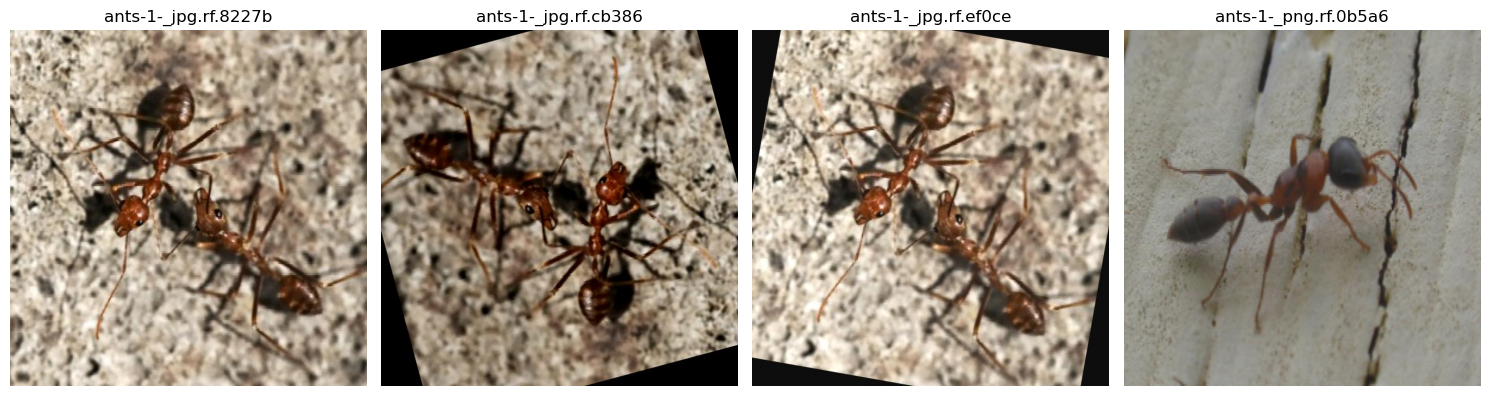


Dataset Statistics:

TRAIN:
  Total boxes: 15282
  Class distribution:
    Ants: 2231
    Bees: 1596
    Beetles: 1058
    Caterpillars: 1740
    Earthworms: 1083
    Earwigs: 1182
    Grasshoppers: 1071
    Moths: 1062
    Slugs: 918
    Snails: 1199
    Wasps: 1167
    Weevils: 975

TEST:
  Total boxes: 689
  Class distribution:
    Ants: 87
    Bees: 44
    Beetles: 44
    Caterpillars: 93
    Earthworms: 40
    Earwigs: 73
    Grasshoppers: 55
    Moths: 47
    Slugs: 51
    Snails: 50
    Wasps: 47
    Weevils: 58

VALID:
  Total boxes: 1341
  Class distribution:
    Ants: 178
    Bees: 110
    Beetles: 100
    Caterpillars: 139
    Earthworms: 72
    Earwigs: 104
    Grasshoppers: 102
    Moths: 101
    Slugs: 91
    Snails: 107
    Wasps: 132
    Weevils: 105


In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define your dataset path - CHANGE THIS TO YOUR LOCAL PATH
# Option 1: Use raw string (recommended for Windows)
dataset_path = r"C:\Users\gul\3D Objects\25t3\comp9517\Project"

# Option 2: Use forward slashes (also works on Windows)
# dataset_path = "C:/Users/YourUsername/3D Objects/25t3/comp9517/Project"

# Option 3: Use Path object (most reliable)
# dataset_path = Path("C:/Users/YourUsername/3D Objects/25t3/comp9517/Project")

# 1. LIST FILES IN EACH DIRECTORY
def list_dataset_structure(base_path):
    """Display the dataset structure and file counts"""
    base_path = Path(base_path)  # Convert to Path object
    
    for split in ['train', 'test', 'valid']:
        split_path = base_path / split
        
        # Count images and labels
        images_path = split_path / 'images'
        labels_path = split_path / 'labels'
        
        num_images = len(list(images_path.glob('*'))) if images_path.exists() else 0
        num_labels = len(list(labels_path.glob('*'))) if labels_path.exists() else 0
        
        print(f"\n{split.upper()} Set:")
        print(f"  Path: {split_path}")
        print(f"  Images: {num_images}")
        print(f"  Labels: {num_labels}")

# 2. READ SAMPLE IMAGES
def read_sample_images(base_path, split='train', num_samples=4):
    """Read and display sample images"""
    base_path = Path(base_path)
    images_path = base_path / split / 'images'
    
    if not images_path.exists():
        print(f"Error: Path does not exist: {images_path}")
        return
    
    image_files = list(images_path.glob('*'))[:num_samples]
    
    if not image_files:
        print(f"No images found in {images_path}")
        return
    
    fig, axes = plt.subplots(1, len(image_files), figsize=(15, 4))
    if len(image_files) == 1:
        axes = [axes]
    
    for idx, img_path in enumerate(image_files):
        img = Image.open(img_path)
        
        axes[idx].imshow(img)
        axes[idx].set_title(img_path.name[:20])
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# 3. READ YOLO LABEL FILES
def read_yolo_label(label_path):
    """
    Read a YOLO format label file
    Returns list of [class_id, x_center, y_center, width, height]
    """
    annotations = []
    with open(label_path, 'r') as f:
        for line in f:
            values = line.strip().split()
            if len(values) == 5:
                class_id = int(values[0])
                x_center = float(values[1])
                y_center = float(values[2])
                width = float(values[3])
                height = float(values[4])
                annotations.append([class_id, x_center, y_center, width, height])
    return annotations

# 5. GET DATASET STATISTICS
def get_dataset_statistics(base_path):
    """Get statistics about the dataset"""
    base_path = Path(base_path)
    stats = {}
    
    for split in ['train', 'test', 'valid']:
        labels_path = base_path / split / 'labels'
        
        if not labels_path.exists():
            continue
            
        class_counts = {}
        total_boxes = 0
        
        for label_file in labels_path.glob('*.txt'):
            annotations = read_yolo_label(label_file)
            
            for ann in annotations:
                class_id = ann[0]
                class_counts[class_id] = class_counts.get(class_id, 0) + 1
                total_boxes += 1
        
        stats[split] = {
            'total_boxes': total_boxes,
            'class_distribution': class_counts
        }
    
    return stats


# EXAMPLE USAGE:
if __name__ == "__main__":
    # Class names from your dataset
    class_names = ['Ants', 'Bees', 'Beetles', 'Caterpillars', 'Earthworms', 
                   'Earwigs', 'Grasshoppers', 'Moths', 'Slugs', 'Snails', 
                   'Wasps', 'Weevils']
    
    # 1. Show dataset structure
    print("Dataset Structure:")
    list_dataset_structure(dataset_path)
    
    # 2. Display sample images
    print("\nSample Images:")
    read_sample_images(dataset_path, split='train', num_samples=4)
    
    # 4. Get statistics
    print("\nDataset Statistics:")
    stats = get_dataset_statistics(dataset_path)
    for split, data in stats.items():
        print(f"\n{split.upper()}:")
        print(f"  Total boxes: {data['total_boxes']}")
        print(f"  Class distribution:")
        for class_id, count in sorted(data['class_distribution'].items()):
            class_name = class_names[class_id] if class_id < len(class_names) else str(class_id)
            print(f"    {class_name}: {count}")

Dataset Structure:

TRAIN Set:
  Path: C:\Users\gul\3D Objects\25t3\comp9517\Project\train
  Images: 11502
  Labels: 11502

TEST Set:
  Path: C:\Users\gul\3D Objects\25t3\comp9517\Project\test
  Images: 547
  Labels: 546

VALID Set:
  Path: C:\Users\gul\3D Objects\25t3\comp9517\Project\valid
  Images: 1095
  Labels: 1095

Sample Images:


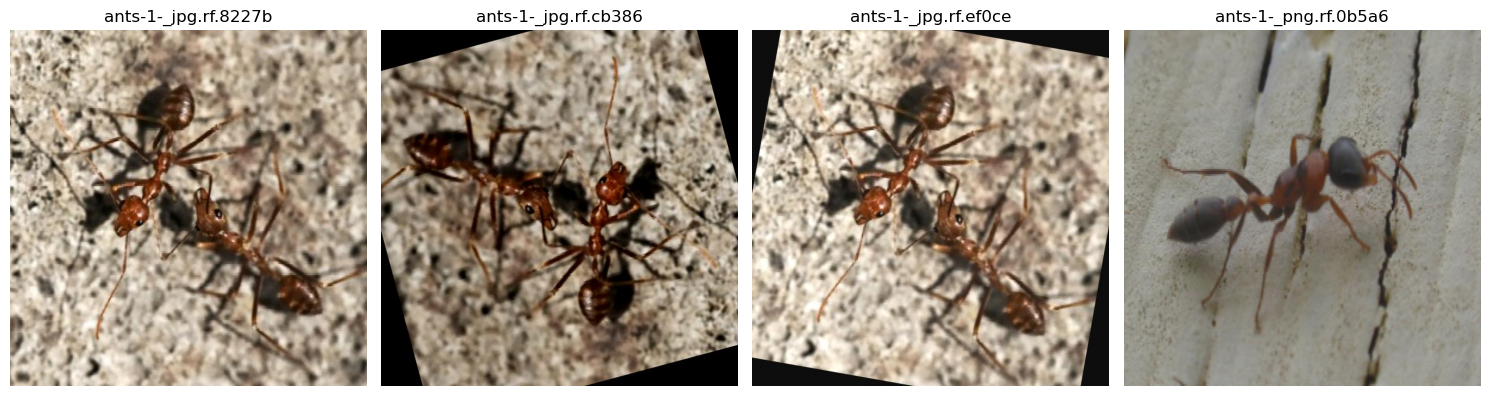


Dataset Statistics:

TRAIN:
  Total boxes: 15282
  Class distribution:
    Ants: 2231
    Bees: 1596
    Beetles: 1058
    Caterpillars: 1740
    Earthworms: 1083
    Earwigs: 1182
    Grasshoppers: 1071
    Moths: 1062
    Slugs: 918
    Snails: 1199
    Wasps: 1167
    Weevils: 975

TEST:
  Total boxes: 689
  Class distribution:
    Ants: 87
    Bees: 44
    Beetles: 44
    Caterpillars: 93
    Earthworms: 40
    Earwigs: 73
    Grasshoppers: 55
    Moths: 47
    Slugs: 51
    Snails: 50
    Wasps: 47
    Weevils: 58

VALID:
  Total boxes: 1341
  Class distribution:
    Ants: 178
    Bees: 110
    Beetles: 100
    Caterpillars: 139
    Earthworms: 72
    Earwigs: 104
    Grasshoppers: 102
    Moths: 101
    Slugs: 91
    Snails: 107
    Wasps: 132
    Weevils: 105


In [2]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define your dataset path - CHANGE THIS TO YOUR LOCAL PATH
# Option 1: Use raw string (recommended for Windows)
dataset_path = r"C:\Users\gul\3D Objects\25t3\comp9517\Project"
img_path = r"3D Objects\25t3\comp9517\Project\train\images\bees-169-_jpg.rf.252e20b576a52b52d0f126ea04d6646f.jpg" 
# Option 2: Use forward slashes (also works on Windows)
# dataset_path = "C:/Users/YourUsername/3D Objects/25t3/comp9517/Project"

# Option 3: Use Path object (most reliable)
# dataset_path = Path("C:/Users/YourUsername/3D Objects/25t3/comp9517/Project")

# 1. LIST FILES IN EACH DIRECTORY
def list_dataset_structure(base_path):
    """Display the dataset structure and file counts"""
    base_path = Path(base_path)  # Convert to Path object
    
    for split in ['train', 'test', 'valid']:
        split_path = base_path / split
        
        # Count images and labels
        images_path = split_path / 'images'
        labels_path = split_path / 'labels'
        
        num_images = len(list(images_path.glob('*'))) if images_path.exists() else 0
        num_labels = len(list(labels_path.glob('*'))) if labels_path.exists() else 0
        
        print(f"\n{split.upper()} Set:")
        print(f"  Path: {split_path}")
        print(f"  Images: {num_images}")
        print(f"  Labels: {num_labels}")

# 2. READ SAMPLE IMAGES
def read_sample_images(base_path, split='train', num_samples=4):
    """Read and display sample images"""
    base_path = Path(base_path)
    images_path = base_path / split / 'images'
    
    if not images_path.exists():
        print(f"Error: Path does not exist: {images_path}")
        return
    
    image_files = list(images_path.glob('*'))[:num_samples]
    
    if not image_files:
        print(f"No images found in {images_path}")
        return
    
    fig, axes = plt.subplots(1, len(image_files), figsize=(15, 4))
    if len(image_files) == 1:
        axes = [axes]
    
    for idx, img_path in enumerate(image_files):
        img = Image.open(img_path)
        
        axes[idx].imshow(img)
        axes[idx].set_title(img_path.name[:20])
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# 3. READ YOLO LABEL FILES
def read_yolo_label(label_path):
    """
    Read a YOLO format label file
    Returns list of [class_id, x_center, y_center, width, height]
    """
    annotations = []
    with open(label_path, 'r') as f:
        for line in f:
            values = line.strip().split()
            if len(values) == 5:
                class_id = int(values[0])
                x_center = float(values[1])
                y_center = float(values[2])
                width = float(values[3])
                height = float(values[4])
                annotations.append([class_id, x_center, y_center, width, height])
    return annotations

# 5. GET DATASET STATISTICS
def get_dataset_statistics(base_path):
    """Get statistics about the dataset"""
    base_path = Path(base_path)
    stats = {}
    
    for split in ['train', 'test', 'valid']:
        labels_path = base_path / split / 'labels'
        
        if not labels_path.exists():
            continue
            
        class_counts = {}
        total_boxes = 0
        
        for label_file in labels_path.glob('*.txt'):
            annotations = read_yolo_label(label_file)
            
            for ann in annotations:
                class_id = ann[0]
                class_counts[class_id] = class_counts.get(class_id, 0) + 1
                total_boxes += 1
        
        stats[split] = {
            'total_boxes': total_boxes,
            'class_distribution': class_counts
        }
    
    return stats


# EXAMPLE USAGE:
if __name__ == "__main__":
    # Class names from your dataset
    class_names = ['Ants', 'Bees', 'Beetles', 'Caterpillars', 'Earthworms', 
                   'Earwigs', 'Grasshoppers', 'Moths', 'Slugs', 'Snails', 
                   'Wasps', 'Weevils']
    
    # 1. Show dataset structure
    print("Dataset Structure:")
    list_dataset_structure(dataset_path)
    
    # 2. Display sample images
    print("\nSample Images:")
    read_sample_images(dataset_path, split='train', num_samples=4)
    
    # 4. Get statistics
    print("\nDataset Statistics:")
    stats = get_dataset_statistics(dataset_path)
    for split, data in stats.items():
        print(f"\n{split.upper()}:")
        print(f"  Total boxes: {data['total_boxes']}")
        print(f"  Class distribution:")
        for class_id, count in sorted(data['class_distribution'].items()):
            class_name = class_names[class_id] if class_id < len(class_names) else str(class_id)
            print(f"    {class_name}: {count}")

In [3]:
def show_yolo_labelled_image(image_path, label_path, class_names=None):
    """Display image with YOLO bounding boxes."""
    img = np.array(Image.open(image_path).convert("RGB"))
    h, w, _ = img.shape
    
    annotations = read_yolo_label(label_path)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(img)
    
    for ann in annotations:
        class_id, x_center, y_center, box_w, box_h = ann
        # Convert normalized YOLO coordinates → pixel coordinates
        x_center *= w
        y_center *= h
        box_w *= w
        box_h *= h
        x_min = x_center - box_w / 2
        y_min = y_center - box_h / 2
        
        # Draw rectangle
        rect = plt.Rectangle((x_min, y_min), box_w, box_h, fill=False, 
                             color='lime', linewidth=2)
        ax.add_patch(rect)
        
        # Label name
        if class_names and class_id < len(class_names):
            label = class_names[class_id]
        else:
            label = f"Class {class_id}"
            
        ax.text(x_min, y_min - 5, label, color='yellow', fontsize=10, 
                bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
    
    ax.axis('off')
    plt.tight_layout()
    plt.show()


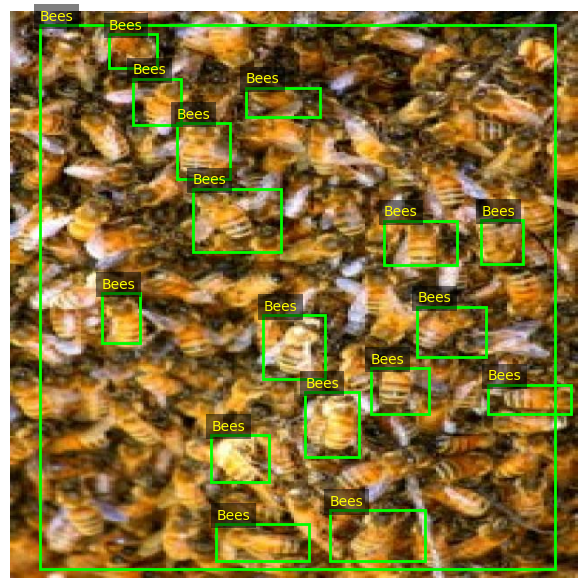

In [4]:
# Define your specific image and label file paths
img_path = Path(dataset_path) / "train" / "images" / "bees-169-_jpg.rf.252e20b576a52b52d0f126ea04d6646f.jpg"
label_path = Path(dataset_path) / "train" / "labels" / "bees-169-_jpg.rf.252e20b576a52b52d0f126ea04d6646f.txt"

show_yolo_labelled_image(img_path, label_path, class_names)
